In [1]:
# Author: Arthur Prigent
# Email: aprigent@geomar.de

In [2]:
from load_librairies import *
import xscale.signal.fitting as xsf
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as mticker
import seaborn as sns
import cartopy.crs as ccrs
import cartopy
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings('ignore')
lon_min = -40
lon_max = 5
lat_min = -3
lat_max = 3

period_str_1 = 1950
period_end_1 = 1999

period_str_2 = 2050
period_end_2 = 2099

def is_jja(month):
    return (month >= 6) & (month <= 8)
def is_mjj(month):
    return (month >= 5) & (month <= 7)

def relative_std(a, b):
    return (a - b) / a

######################
#      TO CHANGE     # 
######################
data_in = '/Users/aprigent/Documents/Thesis_GEOMAR/Projects/FOCI_intercomparison/data/'

path_fig = '/Users/aprigent/Documents/Thesis_GEOMAR/Projects/weakened_sst_variability_CMIP5/figures/new_version/reviews/'
path_data = '/Users/aprigent/Documents/Thesis_GEOMAR/Projects/weakened_sst_variability_CMIP5/scripts/new_version/to_publish/data/'

In [3]:
temp_tmp = xr.open_dataset(data_in+'temp_oras4_1958_2017_60W20W_30S30N.nc')
temp_tmp2=temp_tmp.rename({'DEPTH':'depth','LAT61_120': 'lat','LONN59_20': 'lon','TIME':'time'})

temp = temp_tmp2.THETAO.sel(time=slice(datetime(1982, 1, 1), datetime(2017, 12, 31)))
temp_eq = Atools.data_sub(temp,-40,10,-3,3).mean(dim='lat')


temp_eq_jja = temp_eq.sel(time=is_jja(
    temp_eq['time.month']))


temp_eq_mean_jja = temp_eq_jja.mean(dim='time')


# SST data

In [4]:
#Files created in : 
# scripts_tmp/create_tropical_atlantic_mean_sst_CMIP5_diff.ipynb
sst_mean_cmip5_1 = xr.open_dataset(path_data+'sst_mean_atl_JJA_diff_cmip5_hist.nc')
sst_mean_cmip5_2 = xr.open_dataset(path_data+'sst_mean_atl_JJA_diff_cmip5_rcp85.nc')


In [5]:
#Files created in : 
# scripts_tmp/create_tropical_atlantic_mean_sst_CMIP6_diff.ipynb
sst_mean_cmip6_1 = xr.open_dataset(path_data+'sst_mean_atl_JJA_diff_cmip6_hist.nc')
sst_mean_cmip6_2 = xr.open_dataset(path_data+'sst_mean_atl_JJA_diff_cmip6_rcp85.nc')


In [6]:
## SST change 2050-2099 minus 1950-1999 ##
diff_model_cmip5 = sst_mean_cmip5_2.jja_sst - sst_mean_cmip5_1.jja_sst
diff_model_cmip6 = sst_mean_cmip6_2.jja_sst - sst_mean_cmip6_1.jja_sst

# Subsurface temperature data

In [7]:
#Files created in :
# scripts_tmp/make_thetao_cmip5_eqatl.ipynb

temp_eq_rcp85 = xr.open_dataset(path_data+'temp_eq_cmip5_40W_10E_rcp85.nc')
temp_eq_hist = xr.open_dataset(path_data+'temp_eq_cmip5_40W_10E_hist.nc')

In [8]:
diff_eq_temp_cmip5_jja = temp_eq_rcp85.temp_eq_jja[:] - temp_eq_hist.temp_eq_jja[:]
diff_eq_temp_cmip5 = temp_eq_rcp85.temp_eq[:] - temp_eq_hist.temp_eq[:]

In [9]:
#Files created in :
# scripts_tmp/make_thetao_cmip6_eqatl.ipynb

temp_eq_ssp585_cmip6 = xr.open_dataset(path_data+'temp_eq_cmip6_40W_10E_ssp585.nc')
temp_eq_hist_cmip6 = xr.open_dataset(path_data+'temp_eq_cmip6_40W_10E_hist.nc')

In [10]:
diff_eq_temp_cmip6_jja = temp_eq_ssp585_cmip6.temp_eq_jja[:] - temp_eq_hist_cmip6.temp_eq_jja[:]
diff_eq_temp_cmip6 = temp_eq_ssp585_cmip6.temp_eq[:] - temp_eq_hist_cmip6.temp_eq[:]

# Wind data 

In [11]:
#Files created in :
#scripts_tmp/
## create_tropical_atlantic_mean_uas_CMIP5_diff.ipynb
## create_tropical_atlantic_mean_sst_CMIP5_diff.ipynb
## create_tropical_atlantic_mean_vas_CMIP5_diff.ipynb

uas_mean_1_cmip5 = xr.open_dataset(path_data+'uas_mean_atl_JJA_diff_cmip5_hist.nc')
uas_mean_2_cmip5 = xr.open_dataset(path_data+'uas_mean_atl_JJA_diff_cmip5_rcp85.nc')
diff_uas_cmip5_jja = uas_mean_2_cmip5.jja_uas[:] - uas_mean_1_cmip5.jja_uas[:] 


vas_mean_1_cmip5 = xr.open_dataset(path_data+'vas_mean_atl_JJA_diff_cmip5_hist.nc')
vas_mean_2_cmip5 = xr.open_dataset(path_data+'vas_mean_atl_JJA_diff_cmip5_rcp85.nc')
diff_vas_cmip5_jja = vas_mean_2_cmip5.jja_vas[:] - vas_mean_1_cmip5.jja_vas[:] 

In [12]:
#Files created in:
#scripts_tmp/
## create_tropical_atlantic_mean_uas_CMIP6_diff.ipynb
## create_tropical_atlantic_mean_sst_CMIP6_diff.ipynb
## create_tropical_atlantic_mean_vas_CMIP6_diff.ipynb

uas_mean_1_cmip6 = xr.open_dataset(path_data+'uas_mean_atl_JJA_diff_cmip6_hist.nc')
uas_mean_2_cmip6 = xr.open_dataset(path_data+'uas_mean_atl_JJA_diff_cmip6_rcp85.nc')
diff_uas_cmip6_jja = uas_mean_2_cmip6.jja_uas[:] - uas_mean_1_cmip6.jja_uas[:] 


vas_mean_1_cmip6 = xr.open_dataset(path_data+'vas_mean_atl_JJA_diff_cmip6_hist.nc')
vas_mean_2_cmip6 = xr.open_dataset(path_data+'vas_mean_atl_JJA_diff_cmip6_rcp85.nc')
diff_vas_cmip6_jja = vas_mean_2_cmip6.jja_vas[:] - vas_mean_1_cmip6.jja_vas[:] 


# Figure 4 

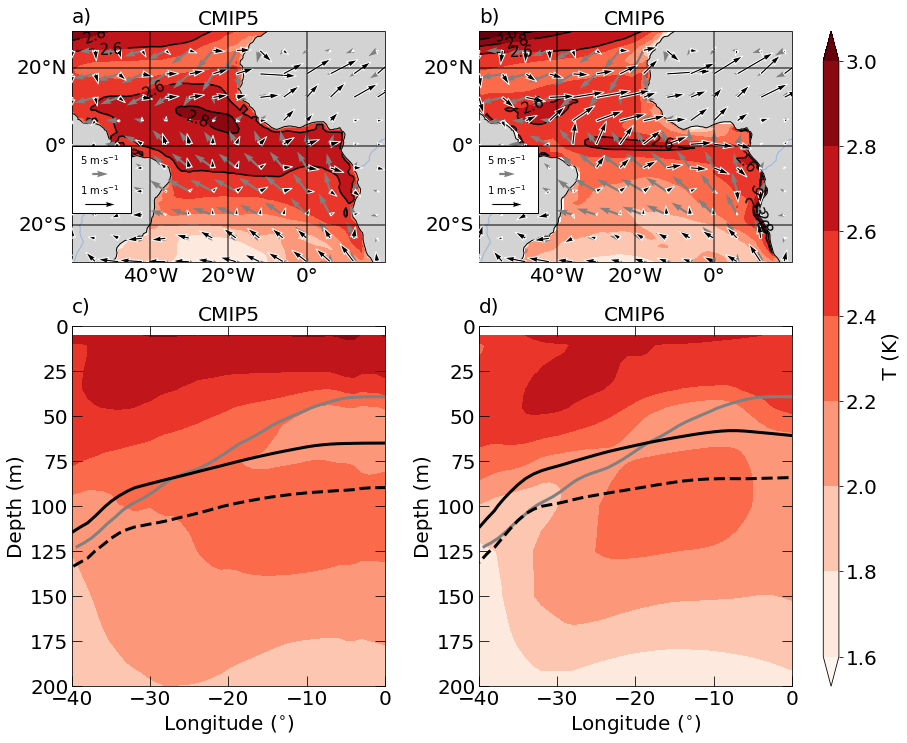

In [13]:
f = plt.figure(figsize=[10,10])


ftz=20
ax0 = plt.subplot(2,2,1,projection=ccrs.PlateCarree())
ax1 = plt.subplot(2,2,2,projection=ccrs.PlateCarree())
ax2 = plt.subplot(2,2,3)
ax3 = plt.subplot(2,2,4)

plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0
                    ,
                    wspace=0.3)
cax0 = inset_axes(ax3,
                   width="5%",  # width = 5% of parent_bbox width
                   height="182%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.1, 0, 1, 1),
                   bbox_transform=ax3.transAxes,
                   borderpad=0,
                   )

cmap = plt.cm.Reds
#cmap = rtcolors.reds
bounds_contour=[2.6,2.8,3]

bounds=np.arange(1.6,3.2,0.2)
bounds_uas = np.arange(-1.5,1.8,0.3)


X,Y = np.meshgrid(diff_vas_cmip5_jja.lon,diff_vas_cmip5_jja.lat)
xx = np.arange(0, diff_uas_cmip5_jja.lat.shape[0],6)
yy = np.arange(0, diff_uas_cmip5_jja.lon.shape[0],6)
points = np.meshgrid(xx,yy)

q0 = ax0.quiver(X[points],Y[points],np.array(uas_mean_1_cmip5.jja_uas.mean(dim='model'))[points],
           np.array(vas_mean_1_cmip5.jja_vas.mean(dim='model'))[points],
                zorder=3,color='grey',scale=100,width=0.007)

ax0.quiverkey(q0,0.09,0.38,5,label='5 m$\cdot$s$^{-1}$',fontproperties={'size': str(ftz-10)})


q01 = ax0.quiver(X[points],Y[points],np.array(diff_uas_cmip5_jja.mean(dim='model'))[points],
           np.array(diff_vas_cmip5_jja.mean(dim='model'))[points],zorder=3,color='black',
           scale=10,edgecolor='white',linewidth=1,width=0.007)

ax0.quiverkey(q01,0.09,0.25,1,label='1 m$\cdot$s$^{-1}$',fontproperties={'size': str(ftz-10)})
ax0.add_patch(mpatches.Rectangle(xy=[-60, -17], width=15, height=17,
                                        facecolor='white',
                                        edgecolor='black',
                                        zorder=3,
                                        transform=ccrs.PlateCarree()))

p0=ax0.contour(diff_model_cmip5.lon,diff_model_cmip5.lat,diff_model_cmip5.mean(dim='model'),
                colors='black',levels=bounds_contour ,transform=ccrs.PlateCarree())
ax0.clabel(p0, inline=1, fontsize=ftz-5)
p0=ax0.contourf(diff_model_cmip5.lon,diff_model_cmip5.lat,diff_model_cmip5.mean(dim='model'),
                cmap=cmap,levels=bounds ,transform=ccrs.PlateCarree(),extend='both')
gl = ax0.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='black', alpha=0.5, linestyle='-',zorder=3)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': ftz, 'color': 'black'}
gl.ylabel_style = {'size': ftz, 'color': 'black'}
gl.xlocator = mticker.FixedLocator([-40,-20, 0])
gl.ylocator = mticker.FixedLocator([-20, 0,20])
ax0.add_feature(cartopy.feature.LAND, edgecolor='black',color='lightgrey',zorder=2)
#ax0.add_feature(cartopy.feature.BORDERS,zorder=2)# adds national borders
ax0.add_feature(cartopy.feature.COASTLINE,zorder=2)# add coastlines
ax0.add_feature(cartopy.feature.RIVERS,zorder=2)# add rivers
ax0.set_title('CMIP5',fontsize=ftz)
cbar = plt.colorbar(p0,cax0,orientation='vertical')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label(r' T (K)', size=ftz)


X,Y = np.meshgrid(diff_vas_cmip6_jja.lon,diff_vas_cmip6_jja.lat)
xx = np.arange(0, diff_uas_cmip6_jja.lat.shape[0],6)
yy = np.arange(0, diff_uas_cmip6_jja.lon.shape[0],6)
points = np.meshgrid(xx,yy)

q1 = ax1.quiver(X[points],Y[points],np.array(uas_mean_1_cmip6.jja_uas.mean(dim='model'))[points],
           np.array(vas_mean_1_cmip6.jja_vas.mean(dim='model'))[points],
                zorder=3,color='grey',scale=100,width=0.007)

ax1.quiverkey(q1,0.09,0.38,5,label='5 m$\cdot$s$^{-1}$',fontproperties={'size': str(ftz-10)})


q11 = ax1.quiver(X[points],Y[points],np.array(diff_uas_cmip6_jja.mean(dim='model'))[points],
           np.array(diff_vas_cmip6_jja.mean(dim='model'))[points],zorder=3,color='black',
           scale=10,edgecolor='white',linewidth=1,width=0.007)

ax1.quiverkey(q11,0.09,0.25,1,label='1 m$\cdot$s$^{-1}$',fontproperties={'size': str(ftz-10)})
ax1.add_patch(mpatches.Rectangle(xy=[-60, -17], width=15, height=17,
                                        facecolor='white',
                                        edgecolor='black',
                                        zorder=3,
                                        transform=ccrs.PlateCarree()))

p0=ax1.contour(diff_model_cmip6.lon,diff_model_cmip6.lat,diff_model_cmip6.mean(dim='model'),
                colors='black',levels=bounds_contour ,transform=ccrs.PlateCarree())
ax0.clabel(p0, inline=1, fontsize=ftz-5)
p0=ax1.contourf(diff_model_cmip6.lon,diff_model_cmip6.lat,diff_model_cmip6.mean(dim='model'),
                cmap=cmap,levels=bounds ,transform=ccrs.PlateCarree(),extend='both')
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='black', alpha=0.5, linestyle='-',zorder=3)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabel_style = {'size': ftz, 'color': 'black'}
gl.ylabel_style = {'size': ftz, 'color': 'black'}
gl.xlocator = mticker.FixedLocator([-40,-20, 0])
gl.ylocator = mticker.FixedLocator([-20, 0,20])
ax1.add_feature(cartopy.feature.LAND, edgecolor='black',color='lightgrey',zorder=2)
#ax1.add_feature(cartopy.feature.BORDERS,zorder=2)# adds national borders
ax1.add_feature(cartopy.feature.COASTLINE,zorder=2)# add coastlines
ax1.add_feature(cartopy.feature.RIVERS,zorder=2)# add rivers
ax1.set_title('CMIP6',fontsize=ftz)

ax2.set_title('CMIP5',fontsize=ftz)
ax2.contour(temp_eq_mean_jja.lon,temp_eq_mean_jja.depth,temp_eq_mean_jja,levels=[20],linewidths=3,colors='grey')
ax2.contour(temp_eq_hist.lon,temp_eq_hist.depth,temp_eq_hist.temp_eq_jja.mean(dim='model'),
            levels=[20],linewidths=3,colors='black')
ax2.contour(temp_eq_rcp85.lon,temp_eq_rcp85.depth,temp_eq_rcp85.temp_eq_jja.mean(dim='model'),
            levels=[20],linewidths=3,colors='black',linestyles='--')
ax2.contourf(diff_eq_temp_cmip5.lon,diff_eq_temp_cmip5.depth,diff_eq_temp_cmip5_jja.mean(dim='model'),
             levels=bounds,cmap=cmap)
ax2.invert_yaxis()
ax2.set_ylim([200,0])
ax2.set_xlim([-40,0])
ax2.tick_params(labelsize=ftz)
ax2.set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)
ax2.set_ylabel('Depth (m)',fontsize=ftz)

ax3.set_title('CMIP6',fontsize=ftz)
ax3.contour(temp_eq_mean_jja.lon,temp_eq_mean_jja.depth,temp_eq_mean_jja,levels=[20],linewidths=3,colors='grey')
ax3.contour(temp_eq_hist_cmip6.lon,temp_eq_hist_cmip6.depth,temp_eq_hist_cmip6.temp_eq_jja.mean(dim='model'),
            levels=[20],colors='black',linewidths=3)
ax3.contour(temp_eq_ssp585_cmip6.lon,temp_eq_ssp585_cmip6.depth,
            temp_eq_ssp585_cmip6.temp_eq_jja.mean(dim='model'),
            levels=[20],linewidths=3,colors='black',linestyles='--')
ax3.contourf(diff_eq_temp_cmip6_jja.lon,diff_eq_temp_cmip6_jja.depth,diff_eq_temp_cmip6_jja.mean(dim='model'),
             levels=bounds,cmap=cmap)
ax3.invert_yaxis()
ax3.set_ylim([200,0])
ax3.set_xlim([-40,0])
ax3.tick_params(labelsize=ftz)
ax3.set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)
ax3.set_ylabel('Depth (m)',fontsize=ftz)

ax2.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=True, left=True, right=True,length=10,direction='in')

ax3.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=True, left=True, right=True,length=10,direction='in')

ax0.text(0, 1.04, string.ascii_lowercase[0]+')', transform=ax0.transAxes,
           size=ftz)

ax1.text(0, 1.04, string.ascii_lowercase[1]+')', transform=ax1.transAxes,
           size=ftz)

ax2.text(0, 1.04, string.ascii_lowercase[2]+')', transform=ax2.transAxes,
           size=ftz)

ax3.text(0, 1.04, string.ascii_lowercase[3]+')', transform=ax3.transAxes,
           size=ftz)


plt.savefig(path_fig + 'figure_04_review.pdf',
             dpi = 300,
            bbox_inches='tight')